<a href="https://colab.research.google.com/github/Dhanushpb/OIBSIP/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

print("Path to dataset files:", path)

100%|██████████| 3.76k/3.76k [00:00<00:00, 5.15MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1


In [8]:
import os
csv_path=os.path.join(path,"car data.csv")


In [11]:
df = pd.read_csv(csv_path)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [14]:
df.duplicated().sum()

np.int64(2)

In [18]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"✅ Dropped {before - after} duplicate rows.\n")
print("🔹 Missing Values Before:\n", df.isnull().sum())
df.dropna(subset=['Selling_Price', 'Car_Name'], inplace=True)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing Values After:\n", df.isnull().sum())
df.columns = df.columns.str.strip().str.replace(" ", "_")
print("\n✅ Cleaned Column Names:\n", list(df.columns))


✅ Dropped 0 duplicate rows.

🔹 Missing Values Before:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

✅ Missing Values After:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

✅ Cleaned Column Names:
 ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


/tmp/ipython-input-2712586347.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [16]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [19]:
from datetime import datetime

current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

df.drop('Year', axis=1, inplace=True)

print("Added feature 'Car_Age'")
print(df.head())


Added feature 'Car_Age'
  Car_Name  Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0     ritz           3.35           5.59       27000    Petrol       Dealer   
1      sx4           4.75           9.54       43000    Diesel       Dealer   
2     ciaz           7.25           9.85        6900    Petrol       Dealer   
3  wagon r           2.85           4.15        5200    Petrol       Dealer   
4    swift           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Owner  Car_Age  
0       Manual      0       11  
1       Manual      0       12  
2       Manual      0        8  
3       Manual      0       14  
4       Manual      0       11  


In [20]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

print("Encoded categorical columns successfully.")
print("\nEncoded DataFrame columns:")
print(df_encoded.columns.tolist())

# Preview final dataset
df_encoded.head()


Encoded categorical columns successfully.

Encoded DataFrame columns:
['Car_Name', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual']


,Car_Name,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,11,False,True,False,True
1,sx4,4.75,9.54,43000,0,12,True,False,False,True
2,ciaz,7.25,9.85,6900,0,8,False,True,False,True
3,wagon r,2.85,4.15,5200,0,14,False,True,False,True
4,swift,4.60,6.87,42450,0,11,True,False,False,True


In [22]:
# Drop 'Car_Name' since it's not useful for modeling
df_encoded = df_encoded.drop('Car_Name', axis=1)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define features (X) and target (y)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Model Trained Successfully!")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


✅ Model Trained Successfully!
R² Score: 0.753
MAE: 1.473
RMSE: 2.525


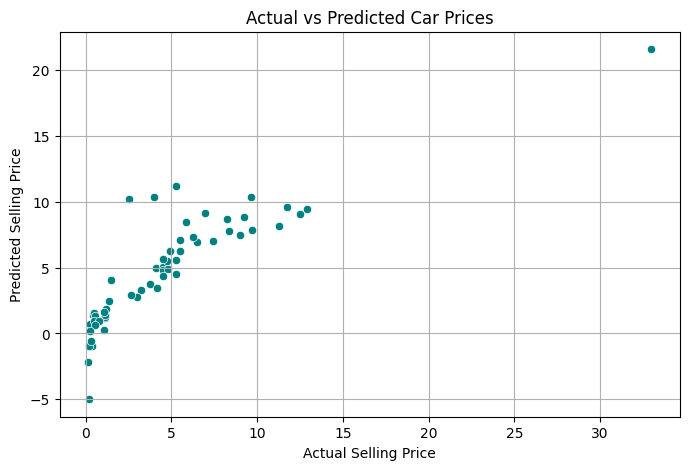

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
